This code follows the guidelines of data cleaning from:

"NGA-Subduction Global Ground-Motion Models with Regional Adjustment Factors citation"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
file_path = '../../data/part1/NGAsub_MegaFlatfile_RotD50_050_R211022_public.xlsx'
df = pd.read_excel(file_path)

In [3]:
# removeing the rows with blank data
metadatamag_rem = df[df.iloc[:,8] == -999].index
metadatahyp_rem = df[df.iloc[:,11] == -999].index
metadatajb_rem = df[df.iloc[:,46] == -999].index
metadatavel_rem = df[df.iloc[:,72] == -999].index
metadataPGA_rem = df[df.iloc[:,114] == -999].index

# Combine the indices to be removed
metadat_rem = metadatamag_rem.union(metadatahyp_rem).union(metadatajb_rem).union(metadatavel_rem).union(metadataPGA_rem)

# Drop rows based on the combined indices
df.drop(index=metadat_rem, inplace=True)

In [4]:
# POINT 8 COLUMN VolcanicArcFlag_ClosestPoint (other than forearc removed)
metadata_forearc_flag = df[df.iloc[:, 61] != 2].index

# POINT 4 (rrup less than 1000 km)
metadatarup_rem = df[df.iloc[:, 47] > 1000].index

# POINT 5 (sensor depth <=2m)
metadatasend_rem = df[df.iloc[:,70] > 2].index

# POINT 2 (seggregate the interface and intraslab)
# POINT 6 (interface Zhyp <=40 and intraslab Zhyp <=200)
metadata_inter = df[(df.iloc[:,17] == 0) & (df.iloc[:, 11] > 40)].index
metadata_intra_slab = df[(df.iloc[:,17] == 1) & (df.iloc[:,11] > 200)].index

# POINT 7 (T < Tlu)
LUT_rem = df[df.iloc[:, 41] > 4].index

# POINT 9 (without multiple event flags)
metadatamlte_rem = df[df.iloc[:, 19] == 1].index

# POINT 11 (without late trigger flag)
metadatalatep_rem = df[df.iloc[:, 39] == 1].index

# Removing PGA > 10 ?
metadatapga_rem = df[df.iloc[:, 113] > 10].index


metadat_rem1 = (
    metadata_forearc_flag.union(metadatarup_rem)
    .union(metadata_inter)
    .union(metadata_intra_slab)
    .union(LUT_rem)
    .union(metadatamlte_rem)
    .union(metadatasend_rem)
    .union(metadatalatep_rem)
    .union(metadatapga_rem)
)

df.drop(index=metadat_rem1, inplace=True)

In [5]:
# POINT 10 (source review flag)
df = df[df.iloc[:, 23] != -1]

# Interface and intraslab flags (only 0 and 1)
metadata_rem_flag1 = df[df.iloc[:, 17] == 2].index
metadata_rem_flag2 = df[df.iloc[:, 17] == 3].index
metadata_rem_flag3 = df[df.iloc[:, 17] == 4].index
metadata_rem_flag4 = df[df.iloc[:, 17] == -444].index
metadata_rem_flag5 = df[df.iloc[:, 17] == -666].index
metadata_rem_flag6 = df[df.iloc[:, 17] == -777].index
metadata_rem_flag7 = df[df.iloc[:, 17] == -888].index
metadata_rem_flag8 = df[df.iloc[:, 17] == -999].index


# Combine all indices using union
metadat = metadata_rem_flag1.union(metadata_rem_flag2).union(metadata_rem_flag3).union(metadata_rem_flag4).union(metadata_rem_flag5).union(metadata_rem_flag6).union(metadata_rem_flag7).union(metadata_rem_flag8)
df.drop(index=metadat, inplace=True)

In [9]:
des_stats = pd.DataFrame(columns=['param','min', 'max', 'mean', 'median', 'STD', 'skew', 'kurtosis'])

In [10]:
def find_stats(column):
    min_values = df[column].min()
    max_values = df[column].max()
    mean_values = df[column].mean()
    median_values = df[column].median()
    std_dev_values = df[column].std()
    skewness_values = df[column].skew()
    kurtosis_values = df[column].kurtosis()

    des_stats.loc[len(des_stats)] = [column, min_values, max_values, mean_values, median_values, std_dev_values, skewness_values, kurtosis_values]
    

In [11]:
for col_name in ["PGA_g", "PGV_cm_sec", "PGD_cm"]:
    find_stats(col_name)

In [12]:
find_stats("Earthquake_Magnitude")

In [13]:
des_stats

,param,min,max,mean,median,STD,skew,kurtosis
0,PGA_g,2.707700e-07,1.1342,0.019916,0.007333,0.060550,9.057086,104.788971
1,PGV_cm_sec,5.858900e-05,66.4040,0.964028,0.323315,2.654208,9.617446,143.506955
2,PGD_cm,5.248200e-06,19.2440,0.148326,0.031159,0.630249,16.910782,388.912286
3,Earthquake_Magnitude,3.300000e+00,8.4100,5.322724,5.140000,0.927896,0.568767,-0.371655


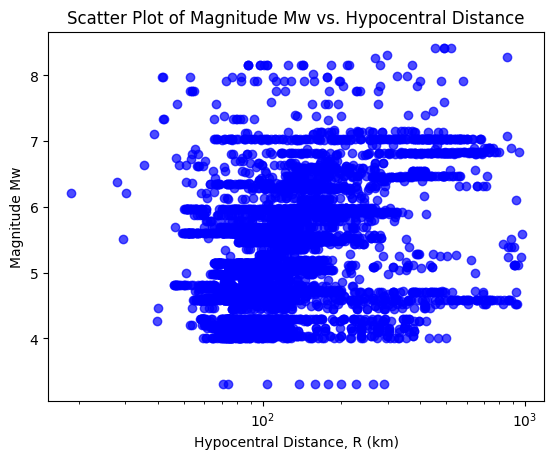

In [14]:
# scatter plot Magnitude Mw vs Hypocentral Distance R (km)
plt.scatter(df['HypD_km'], df['Earthquake_Magnitude'], color='blue', alpha=0.7)

plt.xlabel('Hypocentral Distance, R (km)')
plt.ylabel('Magnitude Mw')

plt.xscale('log')
plt.title('Scatter Plot of Magnitude Mw vs. Hypocentral Distance')

plt.show()

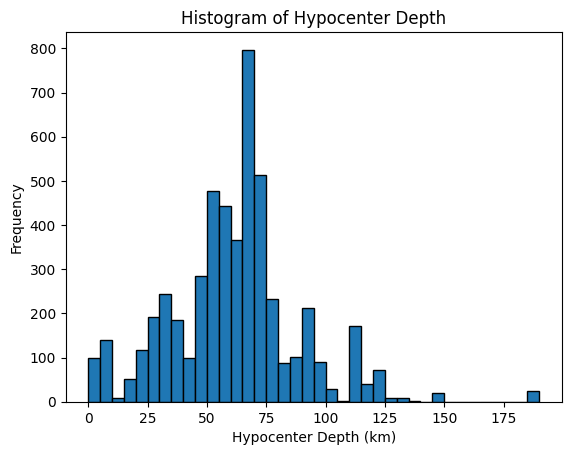

In [15]:
#Histogram of number of earthquake vs Depth (km)
bin_size = 5
plt.hist(df['Hypocenter_Depth_km'], bins=range(0, int(max(df['Hypocenter_Depth_km'])) + bin_size, bin_size), edgecolor='black')

plt.xlabel('Hypocenter Depth (km)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Hypocenter Depth')

plt.show()

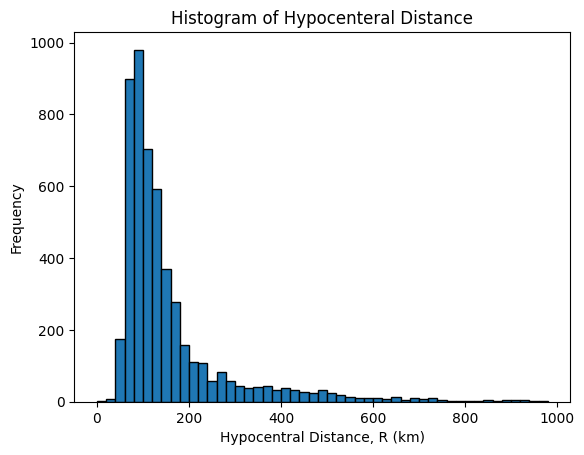

In [16]:
#Histogram of number of earthquake vs Hypocentral Distance
bin_size = 20
plt.hist(df['HypD_km'], bins=range(0, int(max(df['HypD_km'])) + bin_size, bin_size), edgecolor='black')

plt.xlabel('Hypocentral Distance, R (km)')
plt.ylabel('Frequency')
plt.title(f'Histogram of Hypocenteral Distance')

plt.show()

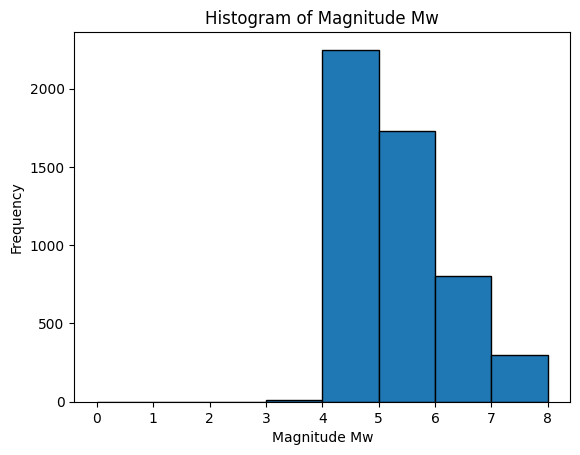

In [17]:
#Histogram of number of earthquake vs Magnitude
bin_size = 1
plt.hist(df['Earthquake_Magnitude'], bins=range(0, int(max(df['Earthquake_Magnitude'])) + bin_size, bin_size), edgecolor='black')

plt.xlabel('Magnitude Mw')
plt.ylabel('Frequency')
plt.title(f'Histogram of Magnitude Mw')

plt.show()

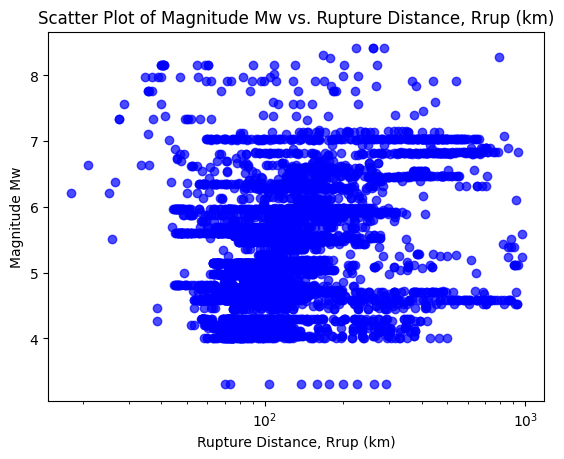

In [18]:
# scatter plot Magnitude Mw vs Joyner-Boore Dist. (km)
plt.scatter(df['ClstD_km'], df['Earthquake_Magnitude'], color='blue', alpha=0.7)

plt.xlabel('Rupture Distance, Rrup (km)')
plt.ylabel('Magnitude Mw')

plt.xscale('log')
plt.title('Scatter Plot of Magnitude Mw vs. Rupture Distance, Rrup (km)')

plt.show()

In [19]:
outliers = df["Rjb_km"][df["Rjb_km"] < 2].index
df.drop(index=outliers, inplace=True)


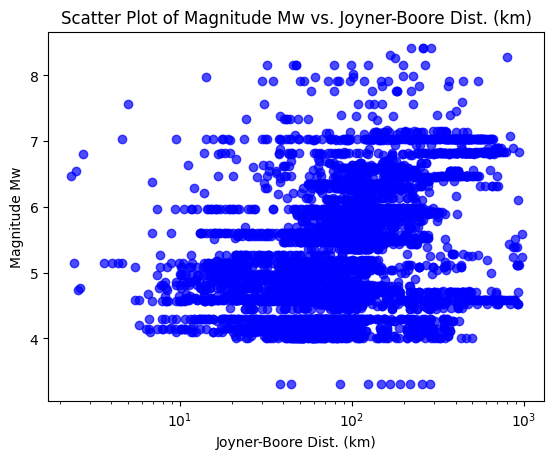

In [20]:
# scatter plot Magnitude Mw vs Joyner-Boore Dist. (km)
plt.scatter(df['Rjb_km'], df['Earthquake_Magnitude'], color='blue', alpha=0.7)

plt.xlabel('Joyner-Boore Dist. (km)')
plt.ylabel('Magnitude Mw')

plt.xscale('log')
plt.title('Scatter Plot of Magnitude Mw vs. Joyner-Boore Dist. (km)')

plt.show()

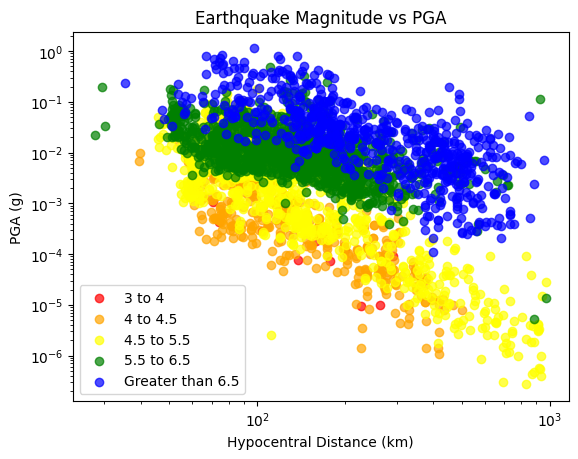

In [21]:
# scatter plot PGA vs Hypocentral Distance R (km)
conditions = [
    (df['Earthquake_Magnitude'] >= 3) & (df['Earthquake_Magnitude'] < 4),
    (df['Earthquake_Magnitude'] >= 4) & (df['Earthquake_Magnitude'] < 4.5),
    (df['Earthquake_Magnitude'] >= 4.5) & (df['Earthquake_Magnitude'] < 5.5),
    (df['Earthquake_Magnitude'] >= 5.5) & (df['Earthquake_Magnitude'] < 6.5),
    (df['Earthquake_Magnitude'] >= 6.5)
]

plt.figure()

for i, (condition, color, label) in enumerate(zip(conditions, ['red', 'orange', 'yellow', 'green', 'blue'], ['3 to 4', '4 to 4.5', '4.5 to 5.5', '5.5 to 6.5', 'Greater than 6.5'])):
    subset = df[condition]
    plt.scatter(subset['HypD_km'], subset['PGA_g'], color=color, alpha=0.7, label=label)

plt.xlabel('Hypocentral Distance (km)')
plt.ylabel('PGA (g)')
plt.title('Earthquake Magnitude vs PGA')

plt.legend(loc='lower left')

plt.yscale('log')
plt.xscale('log')

plt.show()

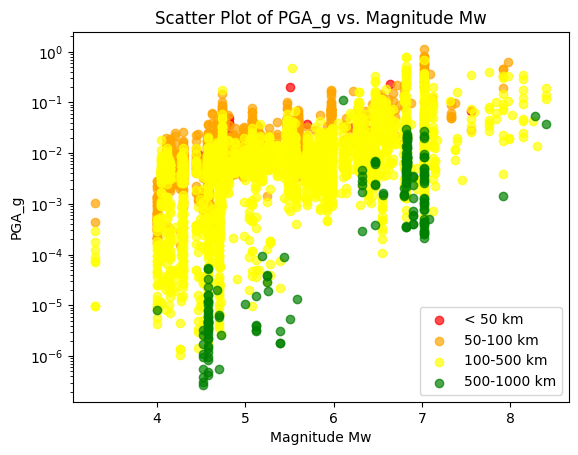

In [22]:
# scatter plot PGA vs Magnitude Mw 
conditions = [
    (df['HypD_km'] < 50),
    (df['HypD_km'] >= 50) & (df['HypD_km'] < 100),
    (df['HypD_km'] >= 100) & (df['HypD_km'] < 500),
    (df['HypD_km'] >= 500) & (df['HypD_km'] < 1000)
]

for condition, color, label in zip(conditions, ['red', 'orange', 'yellow', 'green'], ['< 50 km', '50-100 km', '100-500 km', '500-1000 km']):
    subset = df[condition]
    plt.scatter(subset['Earthquake_Magnitude'], subset['PGA_g'], color=color, alpha=0.7, label=label)

# Set labels and title
plt.xlabel('Magnitude Mw')
plt.ylabel('PGA_g')
plt.yscale('log')
plt.title('Scatter Plot of PGA_g vs. Magnitude Mw')

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [23]:
# interpolation
period = [0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.12, 0.15, 0.17, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1, 2, 3, 4]
psa_sub = df.iloc[:, 116:226].astype(float)

T = df.columns[116:226].to_numpy()
for i in range(len(T)):
    T[i] = T[i].replace('S', '').replace('T', '').replace('pt', '.')

T = T.astype(np.float64)

In [24]:
num_data = psa_sub.shape[0]
psa_sub_final = np.zeros((num_data, len(period)), dtype = np.float64)

for i in range(num_data):
    psa_sub_final[i, :] = np.interp(period, T, psa_sub.iloc[i, :])

In [33]:
psa_sub_final.shape

(5079, 20)

In [35]:
import csv

In [34]:
csv_file = 'PSA.csv'

In [42]:
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the headings
    writer.writerow(period)
    # Write the data
    writer.writerows(psa_sub_final)

In [25]:
psa_stats = pd.DataFrame(columns=['param','min', 'max', 'mean', 'median', 'STD', 'skew', 'kurtosis'])


In [37]:
reg_df = pd.DataFrame(columns=['Rup', 'M', 'R', 'log(R)', 'log(VS30)', 'focal_mech', 'PGA'])


In [38]:
reg_df['Rup'] = df["ClstD_km"]
reg_df['M'] = df['Earthquake_Magnitude']
reg_df['R'] = df['HypD_km']
reg_df['log(R)'] = np.log(df["HypD_km"])
reg_df['log(VS30)'] = np.log(df["Vs30_Selected_for_Analysis_m_s"])
reg_df["focal_mech"] = df["Fault_Type"]
reg_df["PGA"] = df["PGA_g"]

In [39]:
# for regression model
reg_df.to_csv('data_reg.csv', index=False)

In [26]:
from scipy.stats import skew, kurtosis

In [27]:
def find_psa_stats(column):
    min_values = psa_sub_final[column].min()
    max_values = psa_sub_final[column].max()
    mean_values = psa_sub_final[column].mean()
    median_values = np.median(psa_sub_final[column])
    std_dev_values = psa_sub_final[column].std()
    skewness_values = skew(psa_sub_final[column])
    kurtosis_values = kurtosis(psa_sub_final[column])

    psa_stats.loc[len(psa_stats)] = [period[column], min_values, max_values, mean_values, median_values, std_dev_values, skewness_values, kurtosis_values]
    

In [28]:
for i in range(len(period)):
    find_psa_stats(i)

In [29]:
psa_stats

,param,min,max,mean,median,STD,skew,kurtosis
0,0.010,1.678593e-04,0.003299,0.001600,0.001510,0.000759,0.325566,-0.304664
1,0.020,2.339687e-06,0.000166,0.000077,0.000074,0.000045,0.313726,-0.422857
2,0.030,2.379518e-06,0.000334,0.000138,0.000100,0.000103,0.378705,-1.127503
3,0.040,2.268546e-05,0.003496,0.001676,0.001560,0.001015,-0.073076,-1.088270
4,0.050,1.081578e-06,0.000078,0.000034,0.000037,0.000020,0.144026,-0.525950
5,0.075,4.079928e-05,0.007029,0.002739,0.002165,0.001814,0.529071,-0.221291
6,0.100,5.538941e-06,0.000087,0.000049,0.000049,0.000024,0.112459,-1.206148
7,0.120,5.607335e-06,0.000644,0.000172,0.000133,0.000134,2.083409,5.111789
8,0.150,4.842591e-05,0.004547,0.002222,0.002285,0.001273,-0.098532,-0.932080
9,0.170,1.523462e-04,0.181028,0.043767,0.035071,0.043551,1.547002,2.514791


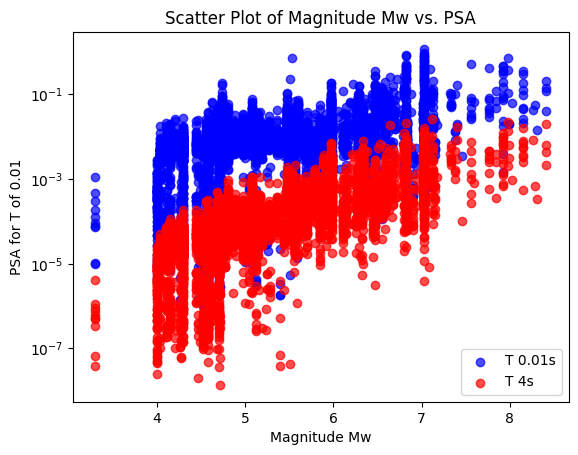

In [30]:
# scatter plot Magnitude Mw vs Joyner-Boore Dist. (km)
plt.scatter(df['Earthquake_Magnitude'], psa_sub_final[:,1], color='blue', alpha=0.7, label = "T 0.01s")
plt.scatter(df['Earthquake_Magnitude'], psa_sub_final[:,-1], color='red', alpha=0.7, label = "T 4s")

plt.legend(loc = "lower right")

plt.ylabel('PSA for T of 0.01')
plt.xlabel('Magnitude Mw')
plt.yscale('log')

plt.title('Scatter Plot of Magnitude Mw vs. PSA')

plt.show()